## Image Basic Operations

In [18]:
import random
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

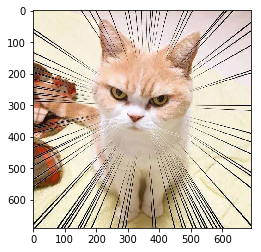

In [28]:
icat = plt.imread('data/cat.jpg')
plt.imshow(icat)

In [23]:
img_gray = cv.imread('data/cat.jpg', 0)

In [24]:
cv.imshow('cat', img_gray)
key = cv.waitKey(3000)
# if key == 27:                     # not work in jupyter notebook (ubuntu 18.0.4)
#     cv.destroyWindow('cat')
cv.destroyAllWindows()

# key =  cv.waitKey(0)
# if key == 27:
#     cv.destroyAllWindows()

In [64]:
img_gray

array([[224, 225, 226, ..., 191, 191, 191],
       [230, 230, 231, ..., 191, 191, 191],
       [232, 233, 233, ..., 191, 191, 191],
       ...,
       [248, 242, 230, ..., 216, 250, 254],
       [238, 239, 250, ..., 239, 242, 242],
       [255, 240, 215, ..., 239, 242, 242]], dtype=uint8)

In [10]:
# show image matrix
img_gray.dtype

dtype('uint8')

In [17]:
# show image data type
img_gray.shape

(690, 690)

In [19]:
# Show image shape: h, w
img_gray.shape

(690, 690)

In [9]:
img = cv.imread('data/cat.jpg')

In [5]:
cv.imshow('cat', img)
cv.waitKey(3000)
cv.destroyAllWindows()

In [66]:
img;

In [24]:
# Show image shape with channels: h, w, c
img.shape


(690, 690, 3)

In [10]:
# Image crop
img_crop = img[50:400,100:600]
cv.imshow('img_crop', img_crop)
cv.waitKey(3000)
cv.destroyAllWindows()

In [37]:
# Color split
B, G, R = cv.split(img)
cv.imshow('B', B)
cv.imshow('G', G)
cv.imshow('R', R)
cv.waitKey(3000)
cv.destroyAllWindows()

In [59]:
# Change color
def random_light_color(img):
    B, G, R = cv.split(img)
    
    for i in [B, G, R]:
        rand = random.randint(-50, 50)
        #print(rand)
        if rand == 0:
            pass
        elif rand > 0:
            lim = 255 - rand
            i[i>lim] = 255
            i[i<=lim] = (rand + i[i<=lim]).astype(img.dtype)
        else:
            lim = 0 - rand
            i[i<lim] = 0
            i[i>=lim] = (rand + i[i>=lim]).astype(img.dtype)
    img_merge = cv.merge((B, G, R))
    
    return img_merge

img_random_color = random_light_color(img)
cv.imshow('img_random_color', img_random_color)
cv.waitKey(3000)
cv.destroyAllWindows()

-50
34
27


In [19]:
# Gamma correction
def adjust_gamma(img, gamma=1.0):
    """Adjust gamma value."""
    inv_gamma = 1.0 / gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)**inv_gamma)*255)
    table = np.array(table).astype('uint8')
    return cv.LUT(img, table)
    
img_dark = cv.imread('data/cat.jpg')
img_brighter = adjust_gamma(img_dark, 2)
cv.imshow('img_dark', img_dark)
cv.imshow('img_brighter', img_brighter)
cv.waitKey(5000)
cv.destroyAllWindows()

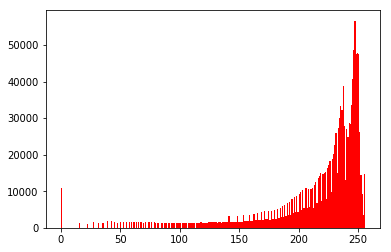

In [20]:
# Histgram
img_small_brighter = cv.resize(img_brighter,
                               (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color='r')

img_yuv = cv.cvtColor(img_small_brighter, cv.COLOR_BGR2YUV)
# Equalize the histogram of the Y channel.
img_yuv[:, :, 0] = cv.equalizeHist(img_yuv[:,:,0])
# Convert the YUV image back to RGB format.
img_output = cv.cvtColor(img_yuv, cv.COLOR_YUV2BGR)

cv.imshow('Color input image', img_small_brighter)
cv.imshow('Histogram equalized', img_output)
cv.waitKey(5000)
cv.destroyAllWindows()

In [25]:
# Rotation
M = cv.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), 30, 1)
img_rotate = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv.imshow('rotated cat', img_rotate)
cv.waitKey(5000)
cv.destroyAllWindows()
M

array([[   0.8660254 ,    0.5       , -126.27876431],
       [  -0.5       ,    0.8660254 ,  218.72123569]])

In [22]:
M[0][2] = M[1][2] = 0 
img_rotate2 = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv.imshow('rotated cat', img_rotate2)
cv.waitKey(5000)
cv.destroyAllWindows()
M

array([[ 0.8660254,  0.5      ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ]])

In [23]:
# Scale + rotation + translation = similarity transform
M = cv.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), 30, 0.5)  # center, angle, scale
img_rotate = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv.imshow('rotated cat', img_rotate)
cv.waitKey(5000)
cv.destroyAllWindows()
M

array([[ 4.33012702e-01,  2.50000000e-01,  1.09360618e+02],
       [-2.50000000e-01,  4.33012702e-01,  2.81860618e+02]])

In [30]:
# Affine Transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols-1, 0], [0, rows-1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])

M = cv.getAffineTransform(pts1, pts2)
dst = cv.warpAffine(img, M, (cols, rows))
cv.imshow('Affine cat', dst)
cv.waitKey(5000)
cv.destroyAllWindows()

In [29]:
# Perspective transform
def random_warp(img, row, col):
    
    height, width, channels = img.shape
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv.getPerspectiveTransform(pts1, pts2)
    img_warp = cv.warpPerspective(img, M_warp, (width, height))
    
    return M_warp, img_warp

M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv.imshow('warp cat', img_warp)
cv.waitKey(5000)
cv.destroyAllWindows()